# RT analyses

- comparing during and after, and both with HCP RT's
- compare RT distributions for majority responses in coaxing and billiards (also other movies with similar RT profiles)


In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
final_data_folder = r'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/RT_online_task'
dat_all = pd.read_csv(os.path.join(final_data_folder,'RT_data_all_subs.csv'))
dat_all.head()

,Unnamed: 0,sub_ind,respDur_keys,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind,consistency
0,0,86.0,left,3.070585,left,0.868510,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0
1,1,86.0,right,1.909830,right,0.669700,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0
2,2,86.0,right,2.362310,right,0.497975,DRIFTINGA2,2021-07-25_08h39.36.916,2.0,1.0
3,3,86.0,left,4.312300,left,1.568915,FISHING3,2021-07-25_08h39.36.916,3.0,1.0
4,4,86.0,right,1.539055,right,0.667690,RANDOMMECH4,2021-07-25_08h39.36.916,4.0,1.0


In [19]:
dat_all.shape

(994, 10)

In [21]:
dat_all = dat_all.loc[dat_all['consistency']==1,:] # select only consistent responses (i.e., same response during and after)
dat_all.shape

(887, 10)

In [22]:
thresh = 8
trial_counts = dat_all.groupby("sub_ind").count()["movie_ind"]
bad_subs = trial_counts[(trial_counts < thresh)].index
#print(bad_subs)
dat_all = dat_all.set_index('sub_ind') # make subj_idx the index
dat_all.drop(bad_subs, inplace=True) # remove bad subjects
dat_all = dat_all.reset_index() #bring back subj_idx as a column

print("Nr. of subjects left",len(dat_all.groupby("sub_ind")))
print("Nr. of rows:",dat_all.shape)

Nr. of subjects left 90
Nr. of rows: (821, 10)


### Analysis 1: is "during" RT predictive of "after RT"?

In [23]:
dat_all['logRTdur'] = np.log(dat_all['respDur_rt'])
dat_all['logRTaft'] = np.log(dat_all['respAfter_rt'])
dat_all['zRTdur'] = stats.zscore(dat_all['respDur_rt'])
dat_all['zRTaft'] = stats.zscore(dat_all['respAfter_rt'])
dat_all

,sub_ind,Unnamed: 0,respDur_keys,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind,consistency,logRTdur,logRTaft,zRTdur,zRTaft
0,86.0,0,left,3.070585,left,0.868510,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0,1.121868,-0.140976,-0.804030,-0.026170
1,86.0,1,right,1.909830,right,0.669700,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0,0.647014,-0.400925,-1.110599,-0.452144
2,86.0,2,right,2.362310,right,0.497975,DRIFTINGA2,2021-07-25_08h39.36.916,2.0,1.0,0.859640,-0.697205,-0.991094,-0.820084
3,86.0,3,left,4.312300,left,1.568915,FISHING3,2021-07-25_08h39.36.916,3.0,1.0,1.461471,0.450384,-0.476078,1.474527
4,86.0,4,right,1.539055,right,0.667690,RANDOMMECH4,2021-07-25_08h39.36.916,4.0,1.0,0.431169,-0.403931,-1.208525,-0.456450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,69.0,1003,left,4.639200,left,0.601600,FISHING3,2021-07-25_14h45.48.361,3.0,1.0,1.534542,-0.508163,-0.389739,-0.598056
817,69.0,1004,right,3.087600,right,0.311200,RANDOMMECH4,2021-07-25_14h45.48.361,4.0,1.0,1.127394,-1.167319,-0.799536,-1.220271
818,69.0,1006,left,2.388300,left,0.425800,SEDUCINGB6,2021-07-25_14h45.48.361,6.0,1.0,0.870582,-0.853786,-0.984229,-0.974727
819,69.0,1007,right,2.380100,right,0.421600,STARA7,2021-07-25_14h45.48.361,7.0,1.0,0.867143,-0.863698,-0.986395,-0.983726


(0.16912462486243188, 1.0952128077608828e-06)

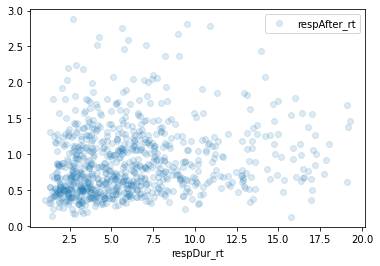

In [24]:
dat_all.plot(x='respDur_rt', y='respAfter_rt', style='o', alpha = .15)
#dat_all['respDur_rt'].corr(dat_all['respAfter_rt'])
stats.pearsonr(dat_all['respDur_rt'],dat_all['respAfter_rt'])

In [25]:
dat_all.loc[dat_all['movie_ind']==i,'respDur_rt'].values

array([ 3.070585,  2.6565  ,  3.0721  ,  2.8651  ,  3.45334 ,  3.3718  ,
        6.024   ,  7.6051  ,  3.5059  ,  8.839   ,  6.4807  ,  3.4473  ,
        3.8974  ,  7.0192  ,  3.5531  ,  2.4184  ,  7.7918  ,  6.2099  ,
        2.7619  ,  2.291   ,  4.0371  ,  1.7381  ,  3.4203  ,  1.622   ,
        3.1622  ,  2.3387  ,  2.525   ,  3.7314  ,  3.672   ,  3.609   ,
       11.639   ,  3.0718  ,  3.48    ,  3.271   , 12.4651  ,  2.2371  ,
        3.7053  ,  2.8591  ,  7.6245  ,  5.0793  ,  2.8179  ,  4.3385  ,
        2.795   ,  3.3003  ,  2.784   ,  5.6848  ,  2.5862  , 14.7985  ,
        1.6018  ,  6.6978  ,  5.54798 ,  2.6947  ,  3.1897  ,  3.8251  ,
        4.765   ,  5.8707  ,  6.0378  ,  2.4577  ,  1.737765,  1.616   ,
        2.5565  ,  2.5752  ,  2.8544  ,  3.6513  ,  6.6537  ,  2.187   ,
        1.753   ,  3.1213  ,  6.6337  ,  3.1932  ,  4.124   ,  2.627   ,
        3.1806  ,  7.3146  ,  2.4637  ,  4.9876  ,  4.7534  ,  4.2524  ,
        4.7672  ,  7.961   ,  2.86    ,  3.379   , 

NameError: name 'movie_names' is not defined

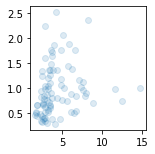

In [26]:
plt.figure(1,figsize = (12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(dat_all.loc[dat_all['movie_ind']==i,'respDur_rt'].values,
             dat_all.loc[dat_all['movie_ind']==i,'respAfter_rt'].values,
             marker='o', ls = 'None', alpha = .15)
             #dat_all.loc[dat_all['movie_ind']==i,:].plot(x='respDur_rt', y='respAfter_rt', style='o', alpha = .15)
    #dat_all['respDur_rt'].corr(dat_all['respAfter_rt'])
    r,p = stats.spearmanr(dat_all.loc[dat_all['movie_ind']==i,'respDur_rt'].values,
                        dat_all.loc[dat_all['movie_ind']==i,'respAfter_rt'].values) 
    #stats.pearsonr(dat_all['respDur_rt'],dat_all['respAfter_rt'])
    extn = ['*' if p<.05 else ' ']
    plt.title(f'{movie_names[i][:4]},\nr={np.round(r,2)},\np={np.round(p,3)}{extn[0]}',fontsize =20)
    plt.xticks(fontsize =16)
    plt.yticks(fontsize =16)
    plt.xlim(0,20)
    plt.ylim(0,3)
plt.tight_layout()

NameError: name 'movie_names' is not defined

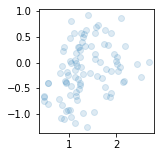

In [15]:
plt.figure(1,figsize = (12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    x = np.log(dat_all.loc[dat_all['movie_ind']==i,'respDur_rt'].values)
    y = np.log(dat_all.loc[dat_all['movie_ind']==i,'respAfter_rt'].values)
    plt.plot(x,y, marker='o', ls = 'None', alpha = .15)
             #dat_all.loc[dat_all['movie_ind']==i,:].plot(x='respDur_rt', y='respAfter_rt', style='o', alpha = .15)
    #dat_all['respDur_rt'].corr(dat_all['respAfter_rt'])
    #r,p = stats.spearmanr(x,y) 
    r,p = stats.pearsonr(x,y) 
    #stats.pearsonr(dat_all['respDur_rt'],dat_all['respAfter_rt'])
    extn = ['*' if p<.05 else ' ']
    plt.title(f'{movie_names[i][:4]},\nr={np.round(r,2)},\np={np.round(p,3)}{extn[0]}',fontsize =20)
    plt.xticks(fontsize =16)
    plt.yticks(fontsize =16)
    #plt.xlim(0,20)
    #plt.ylim(0,3)
plt.tight_layout()

(0.15005411939268337, 7.185247330567464e-06)

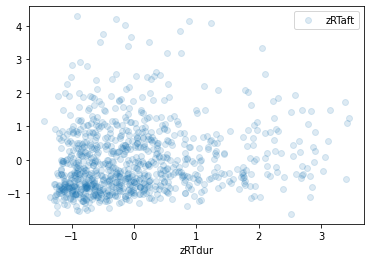

In [16]:
dat_all.plot(x='zRTdur', y='zRTaft', style='o', alpha = .15)
#dat_all['respDur_rt'].corr(dat_all['respAfter_rt'])
stats.pearsonr(dat_all['zRTdur'],dat_all['zRTaft'])

In [15]:
stats.spearmanr(dat_all['respDur_rt'],dat_all['respAfter_rt'])

SpearmanrResult(correlation=0.19780509361240778, pvalue=2.821947082021859e-09)

In [16]:
stats.spearmanr(dat_all['zRTdur'],dat_all['zRTaft'])

SpearmanrResult(correlation=0.19780509361240778, pvalue=2.821947082021859e-09)

(0.19882252677273982, 2.3318904219679807e-09)

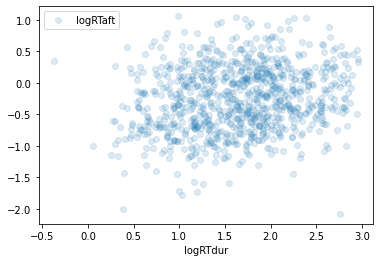

In [17]:
# log transformed RTs

dat_all.plot(x='logRTdur', y='logRTaft', style='o', alpha = .15)
#dat_all['logRTdur'].corr(dat_all['logRTaft'])
stats.pearsonr(dat_all['logRTdur'],dat_all['logRTaft'])

In [18]:
HCP_data_file = r'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/BehaviorAnalyses/hcp_social_behav_for_ddm_stim-coding.csv'
hcp_behdata = pd.read_csv(HCP_data_file)
hcp_behdata = hcp_behdata.loc[hcp_behdata['rt']>.1,:]
hcp_behdata.head()

,subj_idx,stim,movie,rt,response
0,168745,Mental,Scaring.AVI,1.252,1
1,168745,Mental,SEDUCING-B.AVI,0.578,1
2,168745,Random,STAR-A.AVI,1.643,0
3,168745,Mental,SURPRISING-B.AVI,1.082,1
4,168745,Random,TENNIS-A.AVI,1.232,0


In [22]:
movie_names = ['COAXINGB0','BILLIARDA1','DRIFTINGA2','FISHING3','RANDOMMECH4',
              'SCARING5', 'SEDUCINGB6', 'STARA7', 'SURPRISINGB8', 'TENNISA9']

movies_hcp_list = hcp_behdata['movie'].values
movie_ind_list = np.empty((movies_hcp_list.shape[0],))
for i,m in enumerate(movies_hcp_list):
    for j in range(10):
        if movie_names[j][:4] in str.upper(m):
            movie_ind_list[i] = j
            break

hcp_behdata['movie_ind'] =  movie_ind_list
hcp_behdata['logRT'] = np.log(hcp_behdata['rt'])
hcp_behdata['zRT'] = stats.zscore(hcp_behdata['rt'])
hcp_behdata

,subj_idx,stim,movie,rt,response,movie_ind,logRT,zRT
0,168745,Mental,Scaring.AVI,1.252,1,5.0,0.224742,0.415506
1,168745,Mental,SEDUCING-B.AVI,0.578,1,6.0,-0.548181,-0.940478
2,168745,Random,STAR-A.AVI,1.643,0,7.0,0.496524,1.202138
3,168745,Mental,SURPRISING-B.AVI,1.082,1,8.0,0.078811,0.073492
4,168745,Random,TENNIS-A.AVI,1.232,0,9.0,0.208639,0.375269
...,...,...,...,...,...,...,...,...
10144,175136,Mental,COAXING-B.AVI,1.542,1,0.0,0.433080,0.998941
10145,175136,Random,BILLIARD-A.AVI,0.893,0,1.0,-0.113169,-0.306746
10146,175136,Random,DRIFTING-A.AVI,0.895,0,2.0,-0.110932,-0.302723
10147,175136,Mental,Fishing.AVI,0.985,1,3.0,-0.015114,-0.121657


In [23]:
dat_all.groupby(['movie_ind']).mean().logRTdur

movie_ind
0.0    1.352411
1.0    1.295999
2.0    1.689224
3.0    1.950964
4.0    1.778285
5.0    2.236313
6.0    1.541536
7.0    1.555364
8.0    1.616493
9.0    1.482265
Name: logRTdur, dtype: float64

In [24]:
hcp_behdata.groupby(['movie_ind']).mean().logRT

movie_ind
0.0    0.176325
1.0    0.141436
2.0   -0.048315
3.0    0.106058
4.0    0.070830
5.0   -0.120297
6.0   -0.281009
7.0   -0.329794
8.0   -0.176279
9.0   -0.053283
Name: logRT, dtype: float64

In [25]:
dat_all.groupby(['movie']).mean().logRTdur

movie
BILLIARDA1      1.295999
COAXINGB0       1.352411
DRIFTINGA2      1.689224
FISHING3        1.950964
RANDOMMECH4     1.778285
SCARING5        2.236313
SEDUCINGB6      1.541536
STARA7          1.555364
SURPRISINGB8    1.616493
TENNISA9        1.482265
Name: logRTdur, dtype: float64

In [6]:
hcp_behdata.groupby(['movie']).mean().logRT

NameError: name 'hcp_behdata' is not defined

SpearmanrResult(correlation=0.4545454545454545, pvalue=0.186904810349332)

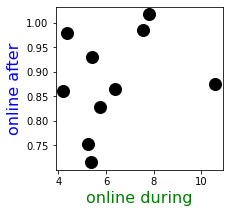

In [27]:
plt.figure(1,figsize =(3,3))
plt.plot(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               dat_all.groupby(['movie_ind']).mean().respAfter_rt,marker ='o', color = 'k',ls = 'None', markersize = 12)
plt.xlabel('online during',fontsize =16, color='g')
plt.ylabel('online after',fontsize =16,color = 'b')
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               dat_all.groupby(['movie_ind']).mean().respAfter_rt)
# for comparability with other coorels below. In general, timept-wise analysis  above makes more sense

In [28]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().zRTdur,
               dat_all.groupby(['movie_ind']).mean().zRTaft)
# for comparability with other coorels below. In general, timept-wise analysis  above makes more sense

SpearmanrResult(correlation=0.4545454545454545, pvalue=0.186904810349332)

In [29]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().logRTdur,
               dat_all.groupby(['movie_ind']).mean().logRTaft)
# same as above, but log RTs

SpearmanrResult(correlation=0.29696969696969694, pvalue=0.4047016712701569)

SpearmanrResult(correlation=-0.12727272727272726, pvalue=0.7260570147627894)

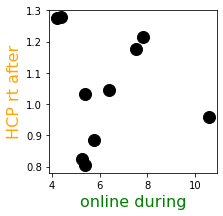

In [30]:
plt.figure(1,figsize =(3,3))
plt.plot(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt,marker ='o', ls = 'None', markersize = 12,color = 'k')
plt.xlabel('online during',fontsize =16,color = 'g')
plt.ylabel('HCP rt after',fontsize =16, color = 'orange')

stats.spearmanr(dat_all.groupby(['movie_ind']).mean().respDur_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt)
# comparing mean "during RTs" with mean HCP RTs
# using meadian instead of mean reduced p values to .38

SpearmanrResult(correlation=0.7212121212121211, pvalue=0.018573155089460208)

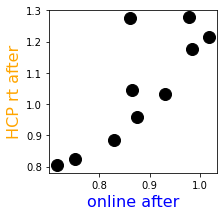

In [31]:
plt.figure(1,figsize =(3,3))
plt.plot(dat_all.groupby(['movie_ind']).mean().respAfter_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt,marker ='o', color = 'k',ls = 'None', markersize = 12)
plt.xlabel('online after',fontsize =16,color = 'b')
plt.ylabel('HCP rt after',fontsize =16,color ='orange')

stats.spearmanr(dat_all.groupby(['movie_ind']).mean().respAfter_rt,
               hcp_behdata.groupby(['movie_ind']).mean().rt)
# comparing mean "during RTs" with mean HCP RTs
# using meadian instead of mean reduced p values to .38

In [32]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().logRTdur,
               hcp_behdata.groupby(['movie_ind']).mean().logRT)
# same as above, but log RTs
# using meadian instead of mean reduced p values to .38

SpearmanrResult(correlation=-0.2121212121212121, pvalue=0.5563057751029299)

In [33]:
dat_all.groupby(['movie_ind']).mean().respDur_rt.values

array([ 4.37188892,  4.20324122,  6.37767053,  7.81966079,  7.54110409,
       10.58758904,  5.24302737,  5.38617539,  5.74724229,  5.39606375])

([<matplotlib.axis.XTick at 0x7fb978fa05b0>,
 [Text(0, 0, 'COAXINGB0'),
  Text(1, 0, 'BILLIARDA1'),
  Text(2, 0, 'DRIFTINGA2'),
  Text(3, 0, 'FISHING3'),
  Text(4, 0, 'RANDOMMECH4'),
  Text(5, 0, 'SCARING5'),
  Text(6, 0, 'SEDUCINGB6'),
  Text(7, 0, 'STARA7'),
  Text(8, 0, 'SURPRISINGB8'),
  Text(9, 0, 'TENNISA9')])

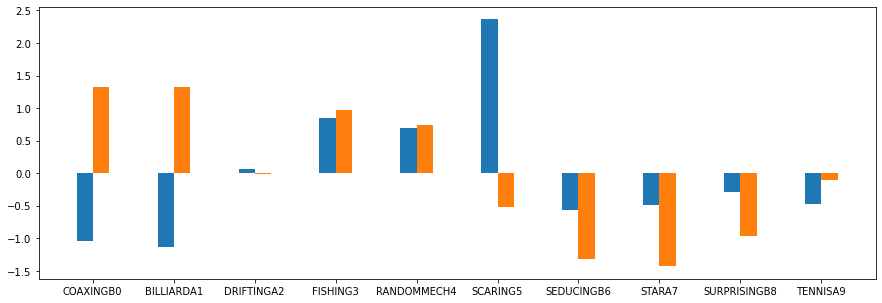

In [34]:
plt.figure(1,figsize =(15,5))
plt.bar(np.arange(0,10),stats.zscore(dat_all.groupby(['movie_ind']).mean().respDur_rt.values), align='edge', 
        width = -.2, label = 'Z-online-during')
plt.bar(np.arange(0,10),stats.zscore(hcp_behdata.groupby(['movie_ind']).mean().rt.values), align='edge', 
        width = .2, label = 'Z-HCP-after')
plt.xticks(range(10),movie_names)

In [36]:
dat_all.groupby(['movie_ind']).mean().respAfter_rt

movie_ind
0.0    0.978619
1.0    0.860454
2.0    0.864559
3.0    1.017348
4.0    0.984044
5.0    0.874769
6.0    0.752342
7.0    0.715292
8.0    0.828630
9.0    0.930829
Name: respAfter_rt, dtype: float64

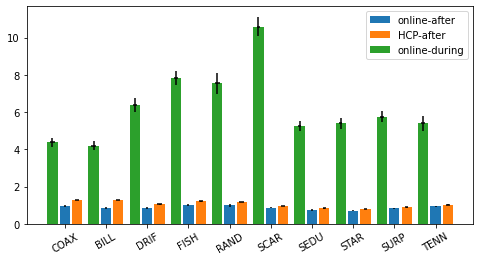

In [51]:
plt.figure(1,figsize =(8,4))
plt.bar(np.arange(0,10),dat_all.groupby(['movie_ind']).mean().respAfter_rt, 
        align='center', width = .25, label = 'online-after')
plt.errorbar(np.arange(0,10),dat_all.groupby(['movie_ind']).mean().respAfter_rt, 
             dat_all.groupby(['movie_ind']).sem().respAfter_rt,color= 'k', ls = 'none')

plt.bar(np.arange(0,10)+.3,hcp_behdata.groupby(['movie_ind']).mean().rt, 
        align='center', width = .25, label = 'HCP-after')
plt.errorbar(np.arange(0,10)+.3,hcp_behdata.groupby(['movie_ind']).mean().rt,
             hcp_behdata.groupby(['movie_ind']).sem().rt, 
             dat_all.groupby(['movie_ind']).sem().respAfter_rt,color= 'k', ls = 'none')


plt.bar(np.arange(0,10)-.3,dat_all.groupby(['movie_ind']).mean().respDur_rt, 
        align='center', width = .25, label = 'online-during')
plt.errorbar(np.arange(0,10)-.3,dat_all.groupby(['movie_ind']).mean().respDur_rt, 
             dat_all.groupby(['movie_ind']).sem().respDur_rt, 
             dat_all.groupby(['movie_ind']).sem().respAfter_rt,color= 'k', ls = 'none')



plt.xticks(range(10),[i[:4] for i in movie_names],rotation=30)
plt.legend()

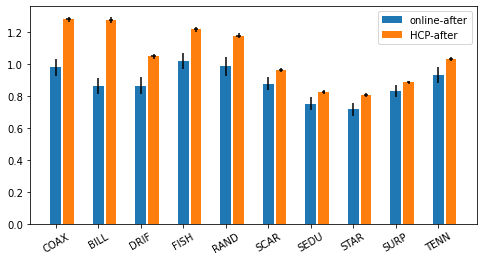

In [52]:
plt.figure(1,figsize =(8,4))

plt.bar(np.arange(0,10),dat_all.groupby(['movie_ind']).mean().respAfter_rt, 
        align='center', width = .25, label = 'online-after')
plt.errorbar(np.arange(0,10),dat_all.groupby(['movie_ind']).mean().respAfter_rt, 
             dat_all.groupby(['movie_ind']).sem().respAfter_rt,color= 'k', ls = 'none')


plt.bar(np.arange(0,10)+.3,hcp_behdata.groupby(['movie_ind']).mean().rt, 
        align='center', width = .25, label = 'HCP-after')
plt.errorbar(np.arange(0,10)+.3,hcp_behdata.groupby(['movie_ind']).mean().rt,
             hcp_behdata.groupby(['movie_ind']).sem().rt, 
             dat_all.groupby(['movie_ind']).sem().respAfter_rt,color= 'k', ls = 'none')


plt.xticks(range(10),[i[:4] for i in movie_names],rotation=30)
plt.legend()

In [141]:
stats.spearmanr(dat_all.groupby(['movie_ind']).mean().logRTaft,
               hcp_behdata.groupby(['movie_ind']).mean().logRT)
# same as above, but log RTs

SpearmanrResult(correlation=0.6484848484848483, pvalue=0.04254012768448945)

- overall, it looks like in the online RT expt, during and after responses correlated
- but taking means per movie and correlating gives a sig correlation only for online-after and hcp-after, not online-during and hcp after. prob because of the variability in online-during (for example, online during and after also were not significant here)

- NEED TO REPEAT THIS WITH CONSISTENT+INCONSISTENT RESPONSES OR RESPONSE FLIPPING TRIALS ALONE OF INCONSISTENT TRIALS, SINCE HERE THERE WAS ONLY CONSISTENT: SO RT'S MAY HAVE BEEN SKEWED

## Identify the most similar distributions (majority)

E.g. see if coaxing-yes and billiards-no are sig. different

### Analysis 3: deciding on which two movies and comapring them

In [184]:

mat1 = dat_all.loc[(dat_all['movie']== movie_names[0]) & (dat_all['respDur_keys']== 'left'),'respDur_rt'].values
mat2 = dat_all.loc[(dat_all['movie']== movie_names[1]) & (dat_all['respDur_keys']== 'right'),'respDur_rt'].values

from scipy.stats import ks_2samp
ks_2samp(mat1,mat2)

KstestResult(statistic=0.15053763440860216, pvalue=0.24350006240630304)